# 데이터 처리 환경 설정

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import collections
import datetime as dt
import time
from sklearn.linear_model import LinearRegression


from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

pd.set_option('display.max_rows', 220)
pd.set_option('display.max_columns', 10)

## Linear Regression function
* def predict_people(city, want):
    * city:동읍면, want:총 유동인구
    * ex) predict_people('장전1동', '총 유동인구')

# Q&A
* 유동인구를 예측했을 때 음수값이 나올 때는 어떻게 해야하는가?

In [2]:
def predict_people(city, want):
    data['년월값']=0
    data['년월값']=pd.to_datetime(data['년월'])
    data['년월값']=data['년월값'].map(dt.datetime.toordinal)
    
    X=pd.DataFrame(data[data['읍면동']==city]['년월값'])
    y=pd.DataFrame(data[data['읍면=ear_month'].dt.strftime('%Y-%m')
    
    line_fitter=LinearRegression()
    line_fitter.fit(X['년월값'].values.reshape(-1,1),y)

    predict=line_fitter.predict([[X['년월값'][11]+30]])
    print(str(int(np.round([[predict]][-1][-1])))+'명')
    
    plt.plot(X['년월'], y, 'o')
    plt.plot(X['년월'],line_fitter.predict(X['년월값'].values.reshape(-1,1)))
    plt.xticks(rotation=20)
    plt.show()
# line_fitter.coef_, line_fitter.intercept_

In [3]:
def predict_money_power(gu):
    data_money['년월값']=0
    data_money['년월값']=pd.to_datetime(data_money['년도월'])
    data_money['년월값']=data_money['년월값'].map(dt.datetime.toordinal)

    X=pd.DataFrame(data_money[data_money['구군']==gu]['년월값'])
    y=pd.DataFrame(data_money[data_money['구군']==gu]['카드이용금액(천원)'])

    X['년월']=X['년월값'].map(dt.date.fromordinal)
    X['년월']=pd.to_datetime(X['년월'])

    data_list=X['년월'].to_list()
    data_list
    df=pd.DataFrame({'year_month': data_list})    

    X=X.reset_index()
    X['년월']= df['year_month'].dt.strftime('%Y-%m')

    line_fitter=LinearRegression()
    line_fitter.fit(X['년월값'].values.reshape(-1,1),y)

    a=line_fitter.predict([[X['년월값'][2]+91]])

    print(str(int(np.round([[a]][-1][-1])))+'원')

    plt.plot(X['년월'], y, 'o')
    plt.plot(X['년월'],line_fitter.predict(X['년월값'].values.reshape(-1,1)))
    plt.xticks(rotation=20)
    plt.show()

## 데이터 불러오기

In [4]:
data19=pd.read_csv("./data/2019동별 유동인구.csv", encoding='utf-8')
data20=pd.read_csv("./data/2020동별 유동인구.csv", encoding='cp949')
data_total=pd.read_csv('./data/2019년도 부산시 총인구(동별).csv', encoding='cp949')
data_money=pd.read_csv("./data/부산_구군별 총 카드이용금액.csv", encoding='utf-8')
data_rival=pd.read_csv("./data/부산_읍면동별_경쟁업체수.csv", encoding='cp949')

In [5]:
data19

,요일,구군,년,월,읍면동,주중/주말,지역코드,평균 유동인구
0,일,중구,2019,1,중앙동,주말,26110,"33,213명"
1,일,중구,2019,1,동광동,주말,26110,"4,692명"
2,일,중구,2019,1,대청동,주말,26110,"3,342명"
3,일,중구,2019,1,보수동,주말,26110,"3,552명"
4,일,중구,2019,1,부평동,주말,26110,"10,458명"
...,...,...,...,...,...,...,...,...
16893,토,기장군,2019,11,철마면,주말,26710,"8,369명"
16894,토,기장군,2019,12,기장읍,주말,26710,"64,705명"
16895,토,기장군,2019,12,장안읍,주말,26710,"13,700명"
16896,토,기장군,2019,12,일광면,주말,26710,"13,718명"


## 읍면동 list로 뽑기

In [6]:
data_dong_list=[]
for i in data20['읍면동'].unique():
    data_dong_list.append(i)

## 2019년 데이터 전처리

In [7]:
for i in range(6,13):
    globals()['df{}'.format(i)]=data19[data19['월']==i]
    
data19=pd.concat([df8,df9,df10,df11,df12], axis=0)
data19=data19.reset_index()

data19['평균 유동인구']=[pd.to_numeric(data19['평균 유동인구'][i].replace(',','').replace('명','')) for i in range(len(data19['평균 유동인구']))]

data_move=[]
for i in range(8,13):
    for j in data_dong_list:
        data_move.append(data19[(data19['읍면동']==j)&(data19['월']==i)]['평균 유동인구'].sum())
        
data19=data19[data19['요일']=='일']
data19=data19.reset_index()
data19['총 유동인구']=0
for i in range(len(data_move)):
    data19['총 유동인구'][i]=data_move[i]
    
data19=data19[(data19['요일']=='일')]
data19=data19[['구군','년','월','읍면동','총 유동인구']]

In [8]:
data19

,구군,년,월,읍면동,총 유동인구
0,중구,2019,8,중앙동,124902
1,중구,2019,8,동광동,29581
2,중구,2019,8,대청동,50901
3,중구,2019,8,보수동,54940
4,중구,2019,8,부평동,68784
...,...,...,...,...,...
995,사상구,2019,12,엄궁동,211134
996,기장군,2019,12,기장읍,423219
997,기장군,2019,12,장안읍,103656
998,기장군,2019,12,일광면,86151


## 2020년 data 전처리

In [9]:
data20['주중/주말 유동인구']=[pd.to_numeric(data20['주중/주말 유동인구'][i].replace(',','')) for i in range(len(data20['주중/주말 유동인구']))]
data_move=[]
for i in range(1,8):
    for j in data_dong_list:
        data_move.append(data20[(data20['읍면동']==j)&(data20['월']==i)]['주중/주말 유동인구'].sum())
        
data20['총 유동인구']=0
for i in range(len(data_move)):
    data20['총 유동인구'][i]=data_move[i]
    
data20=data20[data20['요일']=='일']
data20=data20[['구군','년','월','읍면동','총 유동인구']]

## 19-20 데이터 합치기

In [10]:
data=pd.concat([data19, data20], axis=0)
data=data.reset_index()
for i in range(len(data['읍면동'])):
    if ('제' in data['읍면동'][i]):
        if ('거제' not in data['읍면동'][i]):
            data['읍면동'][i]=data['읍면동'][i].replace('제','')

## 총 인구수 데이터 전처리

In [13]:
data_total=data_total.drop(0)
data_total=data_total.reset_index()
data_total=data_total[['행정구역(동읍면)별','2019']]
data_total.columns=['읍면동','총 인구수']
for i in range(len(data_total['읍면동'])):
    if ('제' in data_total['읍면동'][i]):
        if ('거제' not in data_total['읍면동'][i]):
            data_total['읍면동'][i]=data_total['읍면동'][i].replace('제','')
        elif ('거제제' in data_total['읍면동'][i]):
            data_total['읍면동'][i]=data_total['읍면동'][i].replace('거제제','거제')
        
a=[]
for i in range(len(data_total['읍면동'])):
    if '구' in data_total['읍면동'][i][-1]:
        a.append(i)
        
data_total=data_total.drop([1, 11, 25, 38, 50, 71, 85, 103, 117, 136, 153, 171, 180, 193, 204])
data_total=data_total.reset_index()

In [14]:
data['년월']=0
for i in range(len(data['년'])):
        data['년월'][i]=str(data['년'][i])+'.'+str(data['월'][i])
        data['년월'][i]=pd.to_datetime(data['년월'][i])
        

data_list=data['년월'].to_list()
data_list
df=pd.DataFrame({'year_month': data_list})

data['년월']= df['year_month'].dt.strftime('%Y-%m')    

# 2020년 08월 유동인구 예측
* 함수명이랑 같은 변수 사용하면 'list' object is not callable 이 에러 뜸

In [15]:
predict_list=data['읍면동'].unique().tolist()
predict_people_all=[]
for i in predict_list:
    data['년월값']=0
    data['년월값']=pd.to_datetime(data['년월'])
    data['년월값']=data['년월값'].map(dt.datetime.toordinal)

    X=pd.DataFrame(data[data['읍면동']==i]['년월값'])
    y=pd.DataFrame(data[data['읍면동']==i]['총 유동인구'])
    
    X['년월']=X['년월값'].map(dt.date.fromordinal)
    X['년월']=pd.to_datetime(X['년월'])
    
    data_list=X['년월'].to_list()
    data_list
    df=pd.DataFrame({'year_month': data_list})    
    
    X=X.reset_index()
    X['년월']= df['year_month'].dt.strftime('%Y-%m')
    
    line_fitter=LinearRegression()
    line_fitter.fit(X['년월값'].values.reshape(-1,1),y)
    
    a=line_fitter.predict([[X['년월값'][11]+30]])
    predict_people_all.append(int(np.round([[a]][-1][-1])))

## 동별, 달별 데이터 구축
* 월별 유동인구 수 데이터
* 2020-08 유동인구 예측 데이터


In [16]:
data_per_month=data[['구군','읍면동','년월','총 유동인구']]

In [17]:
data_per_dong=data[data['월']==8]
data_per_dong['총 인구']=0
for i in range(len(data_per_dong['읍면동'])):
    for j in range(len(data_total['읍면동'])):
        if (data_per_dong['읍면동'][i]==data_total['읍면동'][j]):
                data_per_dong['총 인구'][i]=data_total['총 인구수'][j]
                
# data['총 인구']=data['읍면동'].apply(lambda x: data_total.loc[data_total['읍면동']==x].iloc[0,2])
                
data_per_dong=data_per_dong[['구군','읍면동','년월','총 유동인구','총 인구']]

In [19]:
data_per_dong=data_per_dong[['구군','읍면동','총 인구']]
data_per_dong['예측 유동인구']=0
for i in range(len(predict_people_all)):
    data_per_dong['예측 유동인구'][i]=predict_people_all[i]

# 2020년 8월 구매력 예측

## 부산시_구별_구매력 데이터 전처리

In [20]:
data_money['년도월']=0
for i in range(len(data_money['년도'])):
        data_money['년도월'][i]=str(data_money['년도'][i])+'.'+str(data_money['월'][i])
        data_money['년도월'][i]=pd.to_datetime(data_money['년도월'][i])
        

data_money_list=data_money['년도월'].to_list()
data_money_list
df=pd.DataFrame({'year_month': data_money_list})

data_money['년도월']= df['year_month'].dt.strftime('%Y-%m') 

for i in range(len(data_money['3개월 총 카드이용금액(천원)'])):
    data_money['3개월 총 카드이용금액(천원)'][i]=int(data_money['3개월 총 카드이용금액(천원)'][i].replace(',',''))
    
data_money=data_money[['구군','년도월','3개월 총 카드이용금액(천원)']]
data_money.columns=['구군','년도월','카드이용금액(천원)']

## Linear Regression을 이용한 부산시_구별_구매력 예측

In [21]:
data_money_list=data_money['구군'].tolist()

money_power=[]
for i in data_money_list:
    data_money['년월값']=0
    data_money['년월값']=pd.to_datetime(data_money['년도월'])
    data_money['년월값']=data_money['년월값'].map(dt.datetime.toordinal)

    X=pd.DataFrame(data_money[data_money['구군']==i]['년월값'])
    y=pd.DataFrame(data_money[data_money['구군']==i]['카드이용금액(천원)'])

    X['년월']=X['년월값'].map(dt.date.fromordinal)
    X['년월']=pd.to_datetime(X['년월'])

    data_list=X['년월'].to_list()
    data_list
    df=pd.DataFrame({'year_month': data_list})    

    X=X.reset_index()
    X['년월']= df['year_month'].dt.strftime('%Y-%m')

    line_fitter=LinearRegression()
    line_fitter.fit(X['년월값'].values.reshape(-1,1),y)

    a=line_fitter.predict([[X['년월값'][2]+91]])
    money_power.append(int(np.round([[a]][-1][-1])))
    
data_money['예측 구매력']=0
for i in range(len(money_power)):
    data_money['예측 구매력'][i]=money_power[i]
    
data_predict_money=data_money.drop_duplicates('예측 구매력')
data_predict_money=data_predict_money[['구군','예측 구매력']]

data_per_dong_sum=data_per_dong.groupby('구군').sum()
data_per_dong_sum=data_per_dong_sum.reset_index()

data_predict_money['총 인구']=0
data_predict_money['예측 유동인구']=0

for i in range(len(data_predict_money['구군'])):
    for j in range(len(data_per_dong_sum['구군'])):
        if (data_predict_money['구군'][i]==data_per_dong_sum['구군'][j]):
            data_predict_money['총 인구'][i]=data_per_dong_sum['총 인구'][j]
            data_predict_money['예측 유동인구'][i]=data_per_dong_sum['예측 유동인구'][j]

## 구별 데이터를 동별 데이터로 변환작업

In [22]:
data_predict_money['인구 별 구매력']=0
data_predict_money['인구 별 구매력']=data_predict_money['예측 구매력']/data_predict_money['총 인구']

data_money_power=pd.merge(data_predict_money, data_per_dong,on='구군',how='right')
data_money_power=data_money_power[['구군','읍면동','총 인구_y','인구 별 구매력']]

data_money_power['동별 구매력']=0
data_money_power['동별 구매력']=data_money_power['총 인구_y']*data_money_power['인구 별 구매력']

data_money_power['동별 구매력']=np.round(data_money_power['동별 구매력'],-3)

## 동별 데이터에 병합

In [23]:
data_per_dong=pd.merge(data_per_dong,data_money_power,on='읍면동',how='left')
data_per_dong=data_per_dong[['구군_x','읍면동','총 인구','예측 유동인구','동별 구매력']]
data_per_dong.columns=['구군','읍면동','총 인구','예측 유동인구','예측 구매력']

# 동별 경쟁업체 수 병합

In [24]:
data_rival=data_rival[['행정동명','편의점수','대형마트수','슈퍼마켓수','합계']]
data_rival.columns=['읍면동','편의점 수','대형마트 수','슈퍼마켓 수','경쟁업체 수']
data_per_dong=pd.merge(data_per_dong, data_rival, on='읍면동', how='left')

In [25]:
for i in range(len(data_per_dong['예측 구매력'])):
    data_per_dong['예측 구매력'][i]=int(data_per_dong['예측 구매력'][i])
    data_per_dong['편의점 수'][i]=int(data_per_dong['편의점 수'][i])
    data_per_dong['대형마트 수'][i]=int(data_per_dong['대형마트 수'][i])
    data_per_dong['슈퍼마켓 수'][i]=int(data_per_dong['슈퍼마켓 수'][i])
    data_per_dong['경쟁업체 수'][i]=int(data_per_dong['경쟁업체 수'][i])

# 모든 데이터 병합

* merge 하면 열로 부르기 안 됨

In [26]:
data_all=pd.merge(data_per_month, data_per_dong, on='읍면동',how='left')
data_all=data_all[['구군_x','읍면동','년월','총 유동인구','총 인구','예측 유동인구'
                   ,'예측 구매력','편의점 수','대형마트 수','슈퍼마켓 수','경쟁업체 수']]
data_all.columns=[['구군','읍면동','년월','총 유동인구','총 인구','예측 유동인구',
                   '예측 구매력','편의점 수','대형마트 수','슈퍼마켓 수','경쟁업체 수']]
data_all

,구군,읍면동,년월,총 유동인구,총 인구,...,예측 구매력,편의점 수,대형마트 수,슈퍼마켓 수,경쟁업체 수
0,중구,중앙동,2019-08,124902,2029,...,4007000.0,17,3,30,50
1,중구,동광동,2019-08,29581,2957,...,5839000.0,4,0,8,12
2,중구,대청동,2019-08,50901,6692,...,13214000.0,3,0,4,7
3,중구,보수동,2019-08,54940,10777,...,21280000.0,5,2,9,16
4,중구,부평동,2019-08,68784,4717,...,9314000.0,11,0,21,32
...,...,...,...,...,...,...,...,...,...,...,...
2395,기장군,철마면,2020-06,191013,8400,...,56723000.0,3,2,9,14
2396,기장군,기장읍,2020-07,427352,55567,...,375230000.0,44,6,59,109
2397,기장군,장안읍,2020-07,105837,8965,...,60538000.0,11,1,20,32
2398,기장군,일광면,2020-07,96131,8668,...,58533000.0,6,0,10,16


## 데이터 저장

In [27]:
data_per_month.to_csv('./data/save/부산_읍면동_월별_총 유동인구.csv', encoding='euc-kr')
data_per_dong.to_csv('./data/save/부산_동별_데이터.csv', encoding='euc-kr')
data_all.to_csv('./data/save/부산_읍면동_최종 데이터.csv', encoding='euc-kr')

153358명


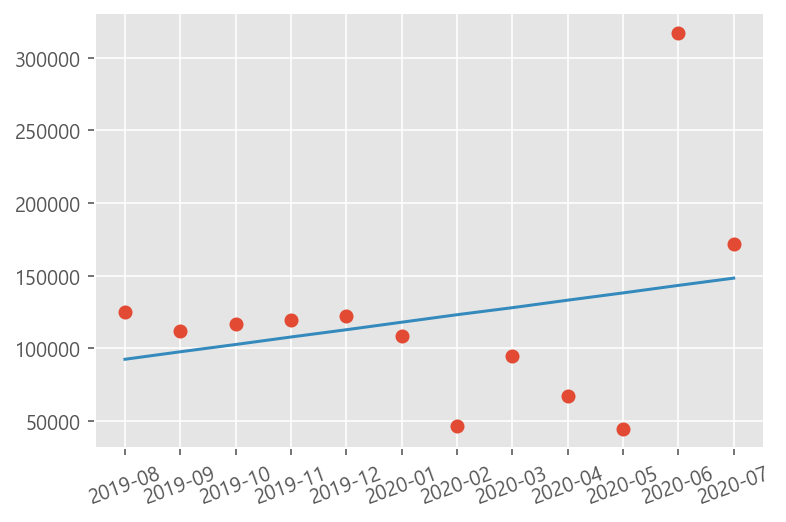

In [28]:
predict_people('중앙동','총 유동인구')

710130197원


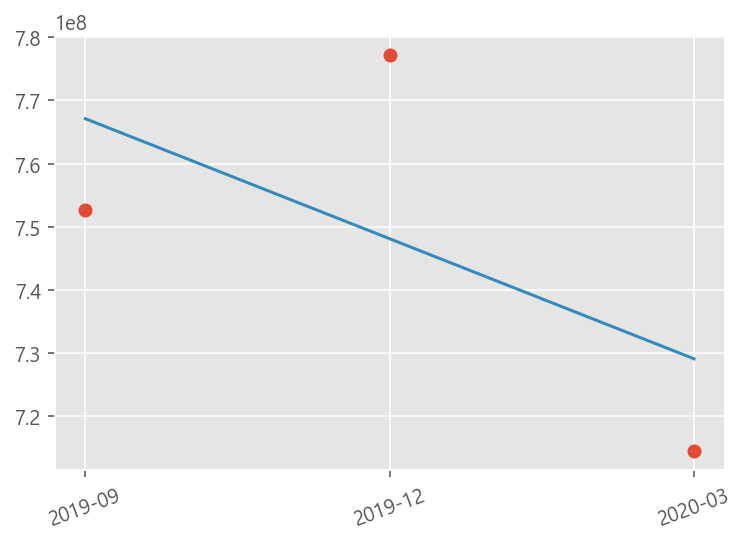

In [29]:
predict_money_power('금정구')

In [ ]:
# data_kind=pd.read_csv("./data/부산_구군별 업종 현황.csv", encoding='utf-8')

In [ ]:
# data_kind=data_kind[data_kind['업종']=='소매업(자동차 제외)']

# data_kind=data_kind.reset_index()

# data_kind['년도월']=0
# for i in range(len(data_kind['년도'])):
#         data_kind['년도월'][i]=str(data_kind['년도'][i])+'.'+str(data_kind['월'][i])
#         data_kind['년도월'][i]=pd.to_datetime(data_kind['년도월'][i])
        

# data_kind_list=data_kind['년도월'].to_list()
# data_kind_list
# df=pd.DataFrame({'year_month': data_kind_list})

# data_kind['년도월']= df['year_month'].dt.strftime('%Y-%m')    

# data_kind=data_kind[['년도월','거주지역','업종','가입자수']]

# data_kind['업종']='소매업'

# for i in range(len(data_kind['가입자수'])):
#     data_kind['가입자수'][i]=int(data_kind['가입자수'][i].replace(',',''))

# df_index=data_kind[data_kind['년도월']=='2019-03'].index
# df_index
# data_kind=data_kind.drop(df_index)

# data_kind=data_kind.reset_index()